# Haberman's Survival Data Set

This dataset contains cases from a study thaty was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of the patients who had undergone surgery for breast cancer. The main objective is to ultimately predict whether a patient survived after breast cancer surgery, when it is given other attributes as input. These attributes will be the age of patient, the year of operation and the number of positive axillary nodes detected in the patient's blood sample. Each instance can be classified into two classes i.e. the patient survived 5 years or longer or the patient died within 5 years.


## Objective:

Our aim is to find an ML Classification algorithm on the data and to get inferences from the data.

### Part 1 : Exploratory Data Analysis 

EDA is used to analyze the Haberman data set to efficiently summarize the main characteristics and features with the help of various methods. The data is explored to the optimum level in accordance with our primary objective.


### Importing Python Libraries

In [38]:
# For performing the task we need standard Python Data Science and ML libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics

### Creating Table From DataSet

In [21]:

h1 = pd.read_csv("haberman.data",names = ["Age Of Patient", "OperationYear", "AuxNodes", "StatusOfSurvival"])
#this displays the first 4 cols of the table

h1.head()

,Age Of Patient,OperationYear,AuxNodes,StatusOfSurvival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### Understanding Features Of The Table

In [23]:
# for displaying structures and number of entries int the table
h1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age Of Patient      306 non-null int64
OperationYear       306 non-null int64
AuxNodes            306 non-null int64
StatusOfSurvival    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


### Table Details 

1.The first column holds the value of Age of all patients.

2.The second column holds the value of the year of operation denoted only by last 2 digits of year.

3.The third column holds the number of nodes that were present in all the blood sample of all patients.

4.The fourth column holds the status of survival of all patients after the operation.
Value '1' denotes that the person survived more than 5 years after the operation.
Value '2' denotes that the person died in less than 5 years.

## Data Preprocessing

Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Data preprocessing transforms the data into a format that will be more easily and effectively processed for the user.

### Data Cleaning

Data is cleansed through processes such as filling in missing values, smoothening the noisy data, or resolving the inconsistencies in the data. 'Cleaning' refers to the process of removing invalid data points from a dataset. Having clean and reliable data in any statistical analysis is the most crucial step.

#### Checking For Null Values

We need to check if there are null values in any of the entries in the table. This is needed to prevent data corruption and further trouble in the processing and analysing of the dataset.

In [27]:
h1.isnull().any()


Age Of Patient      False
OperationYear       False
AuxNodes            False
StatusOfSurvival    False
dtype: bool

#### Our dataset does not have any null values in any of the entries. Which is a good thing to proceed further.

#### Correcting the year format

As you can see the year format is incorrect. It need to be reformatted into a valid one.

In [4]:
h1['OperationYear'] = 1900 + h1['OperationYear']
h1.head()

,Age Of Patient,OperationYear,AuxNodes,StatusOfSurvival
0,30,1964,1,1
1,30,1962,3,1
2,30,1965,0,1
3,31,1959,2,1
4,31,1965,4,1


### Priliminary Analysis 

In [5]:
h1.describe()

,Age Of Patient,OperationYear,AuxNodes,StatusOfSurvival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,1962.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,1958.000000,0.000000,1.000000
25%,44.000000,1960.000000,0.000000,1.000000
50%,52.000000,1963.000000,1.000000,1.000000
75%,60.750000,1965.750000,4.000000,2.000000
max,83.000000,1969.000000,52.000000,2.000000


### Observations 
1) Numbers of rows(training data) is: 306

2) Numbers of features(columns) is: 4

3) Year operation of patient show last 2 digits of years.

4) This dataset contain two class(it can be said binary classification):

5) Status 1 = the patient survived 5 years or longer

6) Status 2 = the patient died within 5 year

7) class 1's , 225 patient survived for 5 years or longer

8) class 2 's, 85 patient died within 5 years

9) It is Imbalance data set because class 1 has 225 data point and class 2 has 81 data point.

### No. Of Classes

In [7]:
# for finding the number of classes in the dataset
h1['StatusOfSurvival'].value_counts(normalize=True)


1    0.735294
2    0.264706
Name: StatusOfSurvival, dtype: float64

## Univariate Analysis


### Description Of Each Class

In [8]:
df_survived = h1[h1['StatusOfSurvival'] == 1]
df_died = h1[h1['StatusOfSurvival'] == 2]
df_survived.describe()


,Age Of Patient,OperationYear,AuxNodes,StatusOfSurvival
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,1962.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,1958.000000,0.000000,1.0
25%,43.000000,1960.000000,0.000000,1.0
50%,52.000000,1963.000000,0.000000,1.0
75%,60.000000,1966.000000,3.000000,1.0
max,77.000000,1969.000000,46.000000,1.0


In [9]:
df_died.describe()


,Age Of Patient,OperationYear,AuxNodes,StatusOfSurvival
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,1962.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,1958.000000,0.000000,2.0
25%,46.000000,1959.000000,1.000000,2.0
50%,53.000000,1963.000000,4.000000,2.0
75%,61.000000,1965.000000,11.000000,2.0
max,83.000000,1969.000000,52.000000,2.0


### Observations
1) Patients survived 5 years or more

Mean = 2.791111

75%(third quartile) = 3.00000

2) Patients died within 5 years

Mean = 7.456790

75%(thirs quartile) = 3.000000 

Here increaase in standard deviation,so we can say that patients who had more positive-auxilary-nodes died early.

### Histograms

A histogram is an accurate representation of the distribution of numerical data that lets you discover, and show, the underlying frequency distribution (shape) of a set of continuous data. It allows the inspection of the data for its underlying distribution (e.g., normal distribution), outliers, skewness, etc. 

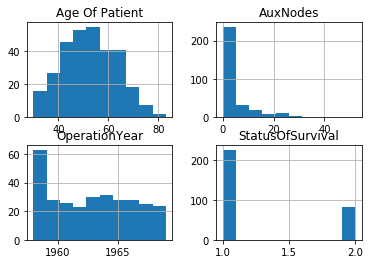

In [10]:
h1.hist()
plt.show()

### Observations

1) From the histograms both Age and OperationYear are not good features for useful insights as the distribution is more similar for both the sort of people who survived and who did not. 

2) Auxiliary node is the only feature that is useful to know about the survival status of patients as there is difference between the distributions for both classes. From that distibution we can infer that most survival patients have fallen in to zero auxiliary node.

3)From the year distribution, we can observe that people who didnt survive suddenly rise and fall in between 1958 and 1960. More number of people are not survived in year of operation of 1965.




### Box Plots 

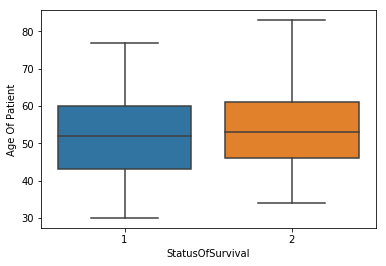

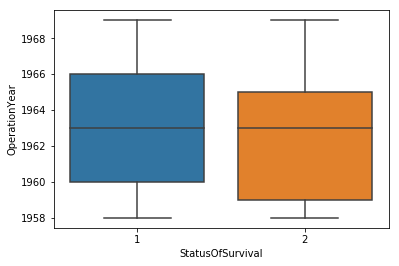

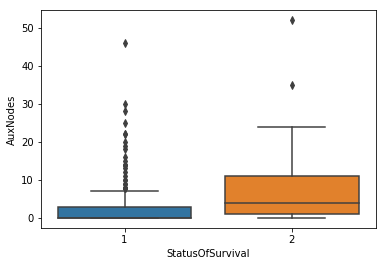

In [11]:
sns.boxplot(x='StatusOfSurvival', y= 'Age Of Patient', data=h1)
plt.show()
sns.boxplot(x='StatusOfSurvival', y= 'OperationYear', data=h1)
plt.show()
sns.boxplot(x='StatusOfSurvival',y='AuxNodes', data=h1)
plt.show()


### Observations

1) The number of positive auxiliary nodes of the survivors is highly densed from 0 to 5.

2) Almost 80% of the patients have less than or equal to 5 positive lymph survived more than 5 years.

3) From box plots, we can say that more no of patients who are dead have age between 46-62,year between 59-65 and the patients who survived have age between 42-60, year between 60-66.

4) There seems to be a lot of outliers in the box plot between AuxNodes and StatusOfSurvival, which needs to be removed.

### Removing the Outliers

As we are witnessing some outliers in the AuxNode vs. StatusOfSurvival box plot, we shall remove the outliers using the Inter Qaurtile Range (IQR).

In [12]:
Q1 = h1.quantile(0.25)
Q2 = h1.quantile(0.75)
IQR = Q2 - Q1
print(IQR)

Age Of Patient      16.75
OperationYear        5.75
AuxNodes             4.00
StatusOfSurvival     1.00
dtype: float64


In [13]:
Q11=Q1-(IQR['AuxNodes'] * 1.5)
Q12=Q2+(IQR['AuxNodes'] * 1.5) 
Q21 = h1['AuxNodes'].quantile(0.25) - (IQR['AuxNodes'] * 1.5)
Q22 = h1['AuxNodes'].quantile(0.75) + (IQR['AuxNodes'] * 1.5)

Q21


-6.0

In [14]:
Q22

10.0

In [15]:
df_haberman_cleaned = h1[(h1['AuxNodes'] > Q21) & \
                               (h1['AuxNodes'] <Q22)]
print('On removing the outliers', df_haberman_cleaned.shape)

On removing the outliers (263, 4)




## Bivariate
Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.


### Pair Plot


c:\users\taruna garg\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
c:\users\taruna garg\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
c:\users\taruna garg\appdata\local\programs\python\python37\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\users\taruna garg\appdata\local\programs\python\python37\lib\site-packages\statsmodels\nonp

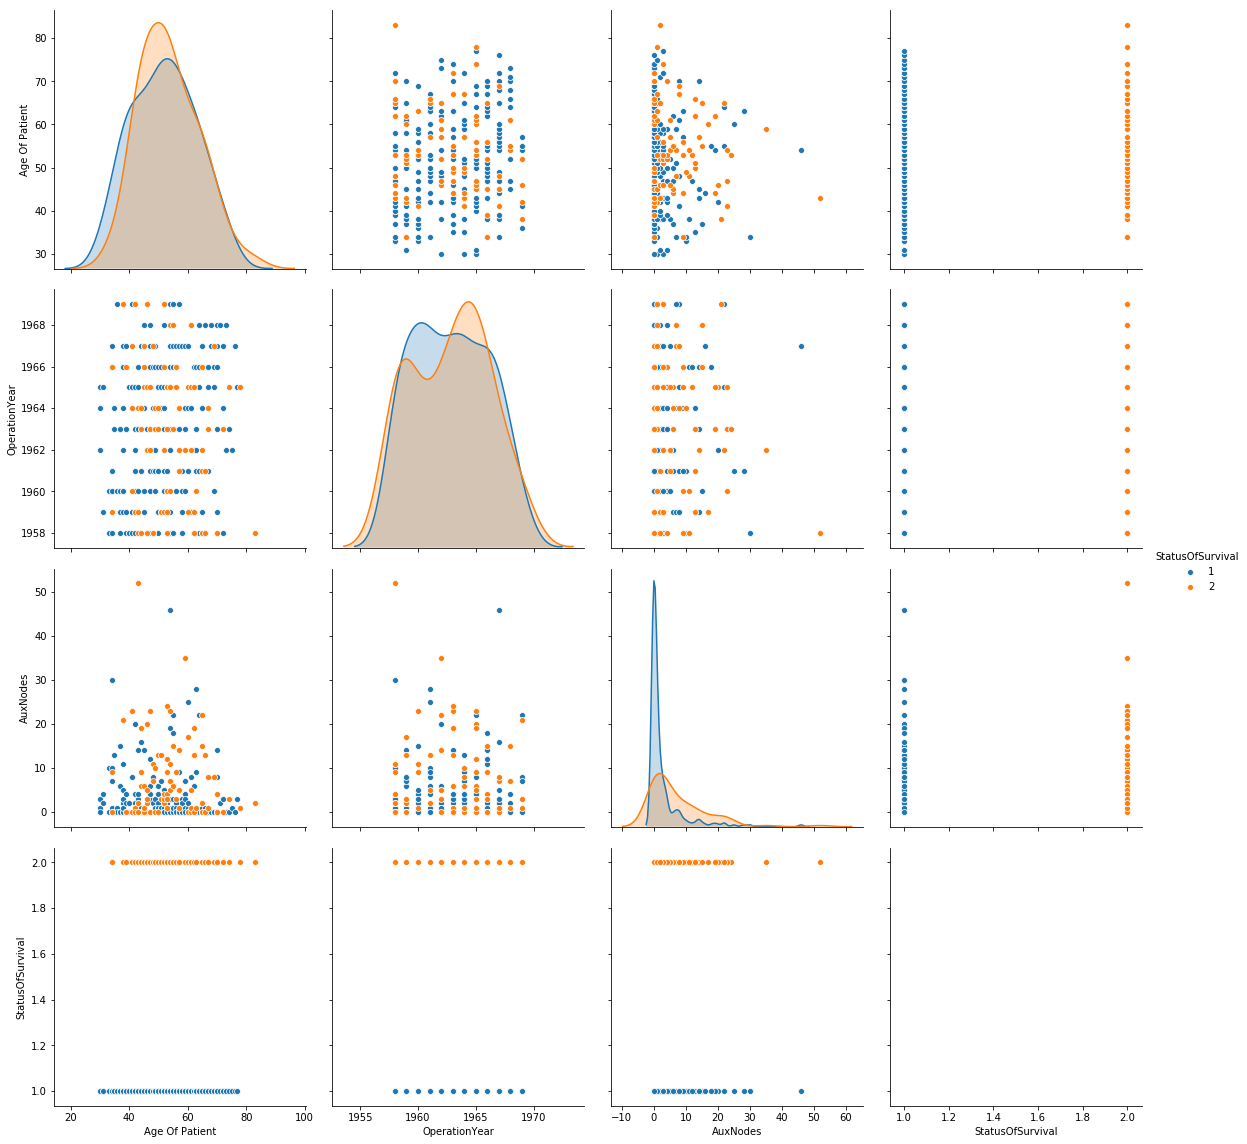

In [16]:
sns.pairplot(h1, hue="StatusOfSurvival", size=4, diag_kind="kde");
plt.show();

### Inference 

1) Auxiliary nodes VERSUS Age is the useful plot to atleast get the insight that most people who survived have 0 auxiliary nodes detected.

2) It looks like we cannot distinguish the data easily with the help of above scalar plots as most of them are overlapping.


### Heat Map


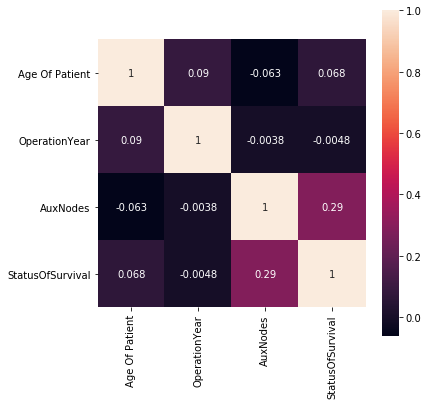

In [26]:
corrmat = h1.corr()
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corrmat, vmax=1, square=True, annot=True);

### Inference
1) On plotting the heat map we get the above plot. It could be infered that none of the nodes are highly correlated that is there is no multivariate correlation. 

2) The correlation between the Auxiliary Node and the Status Of Survival is the maximum. 

3) Therefore we will feed only the AuxNode into Classification Algorithm. 
 


## Part 2: Finding the ML Classification Algorithm


## Comparing different algorithms 

We use the K-fold Validation technique. In this technique we divide the no. of rows in the group of, say, 10. And each of the algorithms are applied on different division. It reduces inconsistency in the prediction score since it takes into account various permutations of the dataset.   

KNN: 0.731720 (0.081576)
CART: 0.649677 (0.143907)


c:\users\taruna garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\taruna garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\taruna garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\taruna garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

RF: 0.669677 (0.088457)


c:\users\taruna garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\taruna garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\taruna garg\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

SVM: 0.729032 (0.092928)


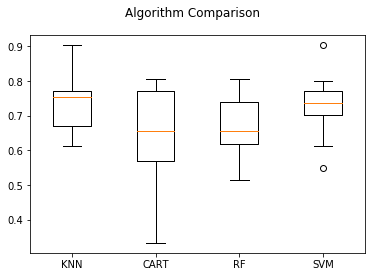

In [18]:
X = h1.drop(['StatusOfSurvival'], axis=1)
Y = h1['StatusOfSurvival']
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []


models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Inference 
1) We see from the comparision using box plots of each of the algorithm that K-Nearest Neighbours(KNN) has the best accuracy score.

2) This implies that we can use the KNN as our classification algorithm.



## Applying KNN Algorithm

K-Nearest Neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure. It is non-parametric, meaning, it does not make any underlying assumptions about the distribution of data. K-Nearest Neighbors is one of the most basic yet essential classification algorithms in Machine Learning.

It basically classifies a data point based on its K-nearest neighbours.

Choosing the optimal value for K is best done by first inspecting the data. In general, a large K value is more precise as it reduces the overall noise. Cross-validation is another way to retrospectively determine a good K value by using an independent dataset to validate the K value. 




### Finding the optimum K-Value

The K-value is found used using hyper parameter tuning. In which we randomly choose a k-value to start with and then we keepe tuning it to get the optimum value.



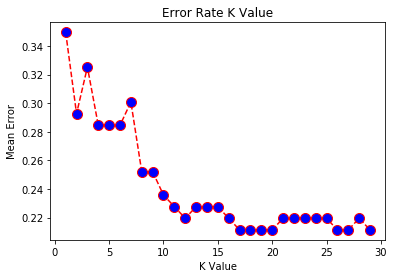

In [35]:
X = h1.drop('StatusOfSurvival', axis=1)  
Y = h1['StatusOfSurvival'] 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40)


error = []

# Calculating error for K values between 1 and 40
for i in range(1, 30):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()

## Observations:
1) Highest K value comes at 0, but it is to be ignored as it makes no sense to compare with 0 neighbours.

2) The optimum K value truns out to be 26.

In [34]:
#Let's look at the prediction accuracy of using k=5.
clf = KNeighborsClassifier(n_neighbors=26)
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(pred, Y_test)

0.8373983739837398

# Conclusion:

1) The Haberman's Dataset consisted of 4 coloumns and 306 rows divided into two class classes: 1- for the people alive, 2- for people died after the operation.

2) On univariate analysis we could not arrive to any conclusion upon but it gave us infomation about the mean, median and various quartiles.

3) On doing the bivariate analysis, arrived at the conclusion that the Survival Of Status depends upopn the AuxNodes

4) Then we compared various algorithms on the basis of their accuracy. KNN turned out to be the best among the other tested.

5) The K-value score came out to be 26, Which gave an accuracy of 83.7%.


                                              =========X=========
